# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv('customerchurn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# OBS-:
1. we dont need customer id column so we can drop that column.
2. most of the columns are yes/no that means 1/0.
3. some columns have categories.
4. target variale is also category with yes/no, i.e. 1/0.

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
for i in churn.columns:
    print(i)
    print(churn[i].unique())
    print('------'*20)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
------------------------------------------------------------------------------------------------------------------------
gender
['Female' 'Male']
------------------------------------------------------------------------------------------------------------------------
SeniorCitizen
[0 1]
------------------------------------------------------------------------------------------------------------------------
Partner
['Yes' 'No']
------------------------------------------------------------------------------------------------------------------------
Dependents
['No' 'Yes']
------------------------------------------------------------------------------------------------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 4

### label encoding columns-:
   * gender
   * senior citizens
   * partner
   * dependents
   * phone service
   * paperless billing
   * churn
    
### value replacable and encoding columns-:
   * multiplelines
   * internet services
   * online security
   * online backup
   * device protection
   * tech support
   * streaming tv
   * streaming movies
 
### sclaing columns
   * tenure # can be divided by 10 to get scaled
   * monthly charges
   * total charges (first needs to be converted into a string)
    
### dummy column
   * payment method
   * contract

In [8]:
churn.shape

(7043, 21)

# EDA

<AxesSubplot:xlabel='Churn', ylabel='count'>

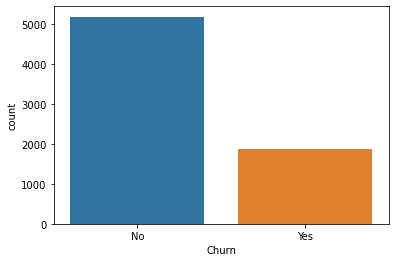

In [9]:
sns.countplot(churn['Churn'])

### OBS-:
there is imbalance in the dataset so we will clear this imbalance by upsampling

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

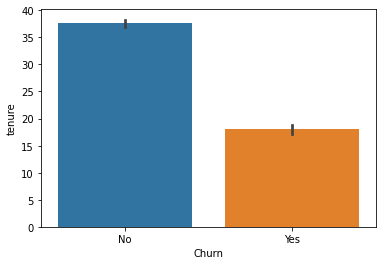

In [10]:
sns.barplot(x= 'Churn', y='tenure', data = churn)

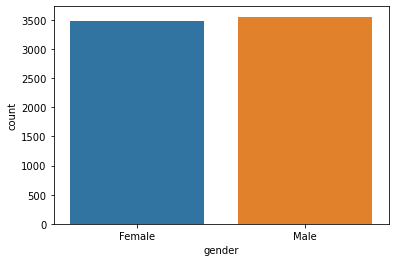

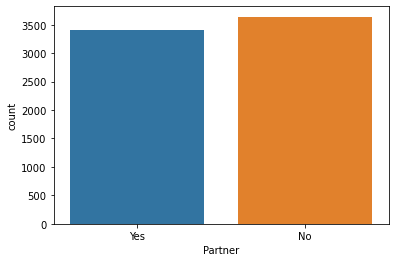

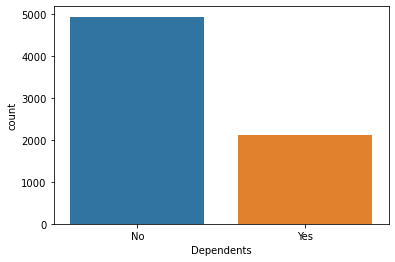

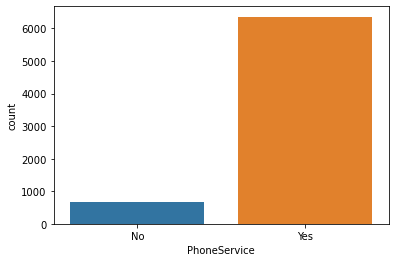

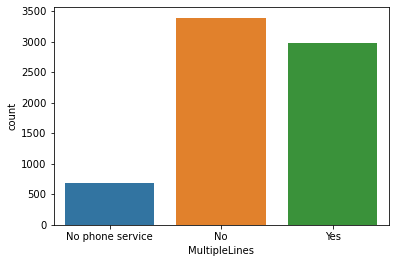

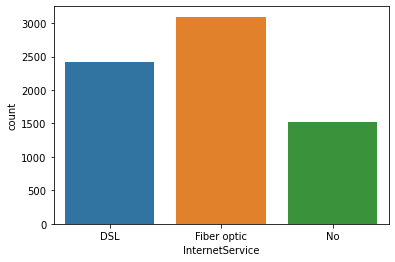

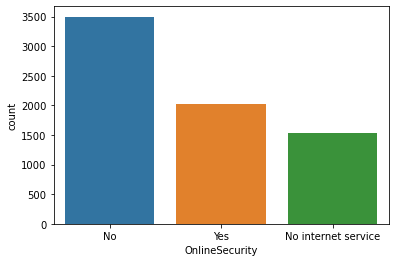

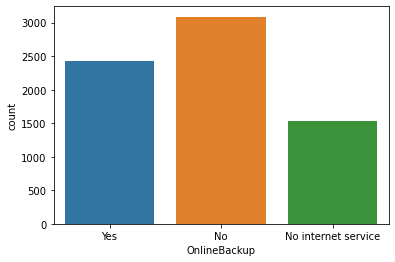

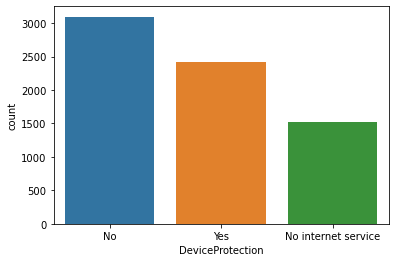

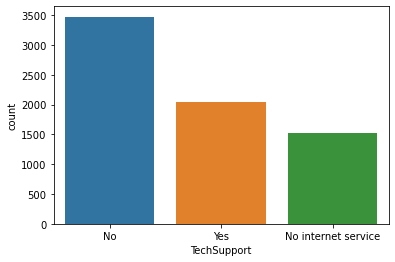

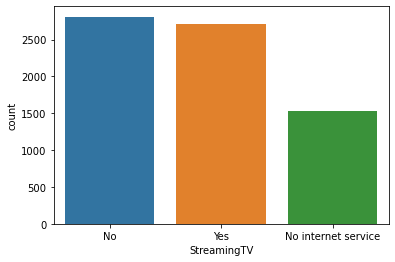

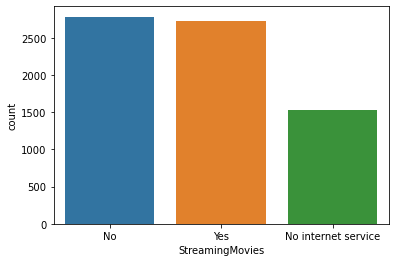

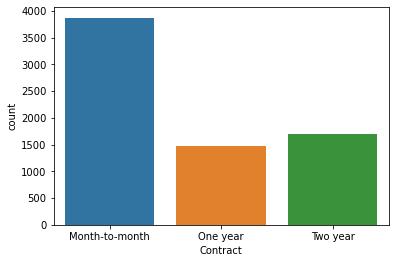

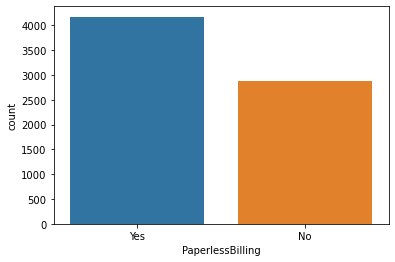

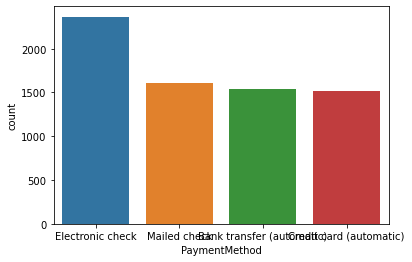

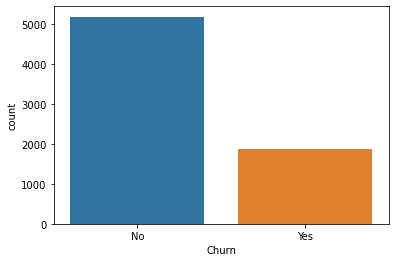

In [20]:
for i in churn.columns.drop(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']):
    plt.figure()
    sns.countplot(churn[i])

<AxesSubplot:xlabel='Churn', ylabel='count'>

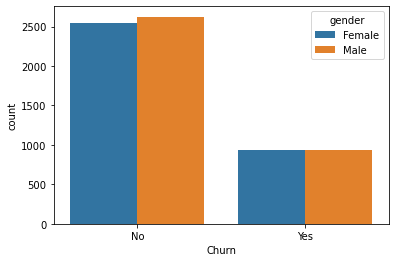

In [21]:
sns.countplot(x = 'Churn', hue='gender', data = churn)

male and female proportions are almost equal in both aspects of churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

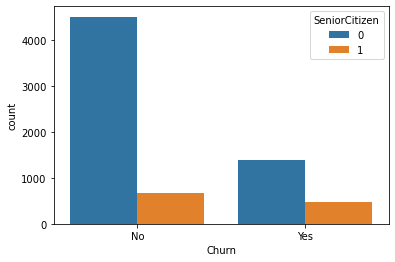

In [23]:
sns.countplot(x = 'Churn', hue='SeniorCitizen', data = churn)

senior citizen are not likely to be churn from the company they are mostly stable

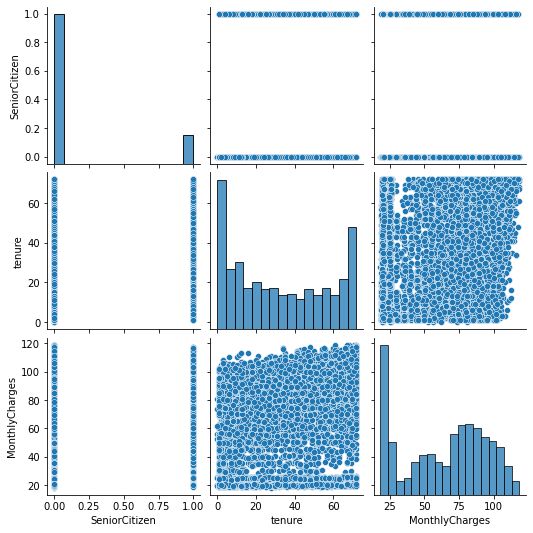

In [25]:
sns.pairplot(churn)

In [26]:
churn.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='Density'>

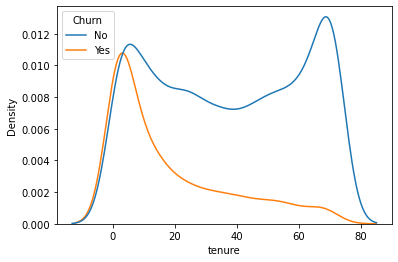

In [27]:
sns.kdeplot(x='tenure', hue='Churn', data = churn)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

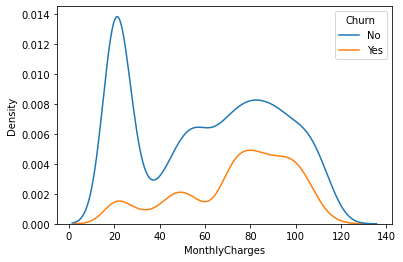

In [28]:
sns.kdeplot(x='MonthlyCharges', hue='Churn', data = churn)

In [51]:
churn.drop(index = 488, axis=0, inplace = True)
# it was a empty string that's needs to be dropped

In [55]:
churn.drop(index = 752, axis=0, inplace = True)

In [59]:
churn.drop(index = 751 ,axis=0, inplace = True)

In [63]:
churn[churn['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [64]:
churn.drop(index = [753,936,1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] ,axis=0, inplace = True)

In [65]:
total_chr = pd.to_numeric(churn['TotalCharges'], downcast='float')

In [67]:
churn['TotalCharges'] = total_chr

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

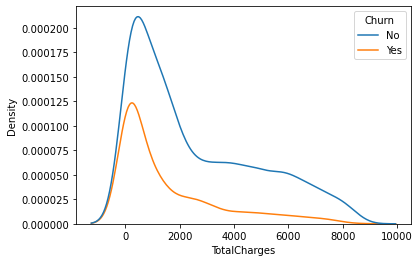

In [69]:
sns.kdeplot(x='TotalCharges', hue='Churn', data = churn)

<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

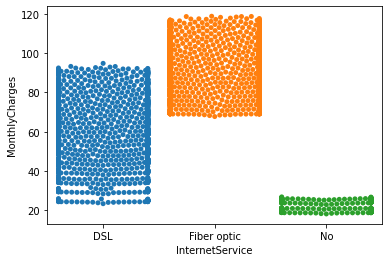

In [70]:
sns.swarmplot(x = 'InternetService', y = 'MonthlyCharges', data = churn)

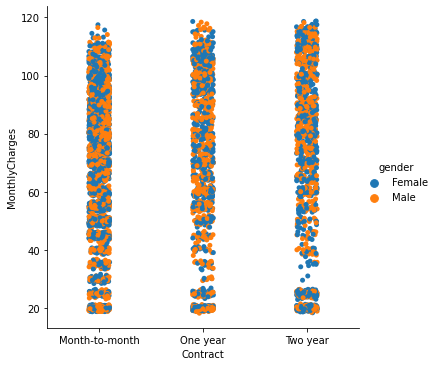

In [71]:
sns.catplot(x = 'Contract', y='MonthlyCharges', data = churn, hue = 'gender')

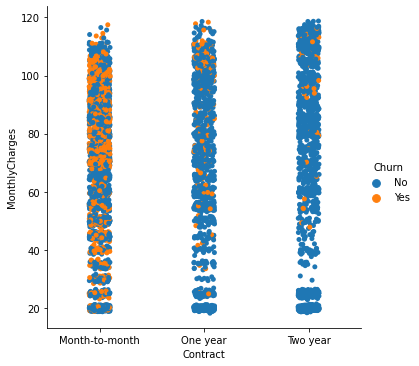

In [75]:
sns.catplot(x = 'Contract', y='MonthlyCharges', data = churn, hue = 'Churn')

in month to month contract the churn is more comparitive to one year / two year contract

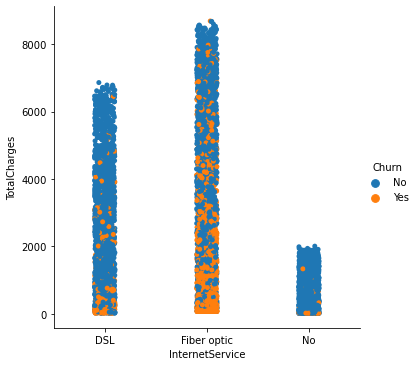

In [77]:
sns.catplot(x = 'InternetService', y='TotalCharges', data = churn, hue = 'Churn')

those who have fiber optic internet services are more likely to churn as if they are not liking the service/speed of internet.

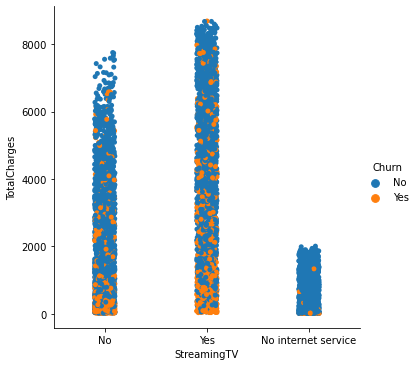

In [79]:
sns.catplot(x = 'StreamingTV', y='TotalCharges', data = churn, hue = 'Churn')

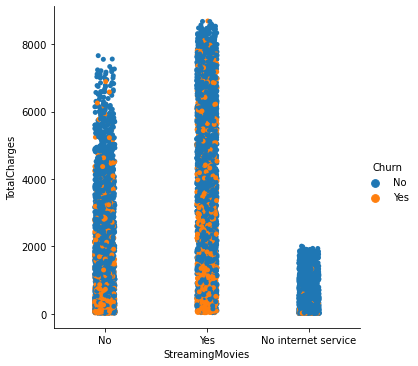

In [80]:
sns.catplot(x = 'StreamingMovies', y='TotalCharges', data = churn, hue = 'Churn')

# Data Preprocessing

# label encoding columns-:
* gender
* senior citizens
* partner
* dependents
* phone service
* paperless billing
* churn
# value replacable and encoding columns-:
* multiplelines
* internet services
* online security
* online backup
* device protection
* tech support
* streaming tv
* streaming movies
# sclaing columns
* tenure # can be divided by 10 to get scaled
* monthly charges
* total charges (first needs to be converted into a string)
# dummy column
* payment method
* contract

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn['gender'] = le.fit_transform(churn['gender'])
churn['SeniorCitizen'] = le.fit_transform(churn['SeniorCitizen'])
churn['Partner'] = le.fit_transform(churn['Partner'])
churn['Dependents'] = le.fit_transform(churn['Dependents'])
churn['PhoneService'] = le.fit_transform(churn['PhoneService'])
churn['PaperlessBilling'] = le.fit_transform(churn['PaperlessBilling'])

In [82]:
for i in churn.columns:
    print(i)
    print(churn[i].unique())
    print('------'*20)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
------------------------------------------------------------------------------------------------------------------------
gender
[0 1]
------------------------------------------------------------------------------------------------------------------------
SeniorCitizen
[0 1]
------------------------------------------------------------------------------------------------------------------------
Partner
[1 0]
------------------------------------------------------------------------------------------------------------------------
Dependents
[0 1]
------------------------------------------------------------------------------------------------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
--------

In [83]:
churn['MultipleLines'] = churn['MultipleLines'].replace({'No phone service':'No'})
churn['InternetService'] = churn['InternetService'].replace({'DSL': 'Yes', 'Fiber optic':'Yes'})
churn['OnlineSecurity'] = churn['OnlineSecurity'].replace({'No internet service':'No'})
churn['OnlineBackup'] = churn['OnlineBackup'].replace({'No internet service':'No'})
churn['DeviceProtection'] = churn['DeviceProtection'].replace({'No internet service':'No'})
churn['TechSupport'] = churn['TechSupport'].replace({'No internet service':'No'})
churn['StreamingTV'] = churn['StreamingTV'].replace({'No internet service':'No'})
churn['StreamingMovies'] = churn['StreamingMovies'].replace({'No internet service':'No'})

In [84]:
churn['MultipleLines'] = le.fit_transform(churn['MultipleLines'])
churn['InternetService'] = le.fit_transform(churn['InternetService'])
churn['OnlineSecurity'] = le.fit_transform(churn['OnlineSecurity'])
churn['OnlineBackup'] = le.fit_transform(churn['OnlineBackup'])
churn['DeviceProtection'] = le.fit_transform(churn['DeviceProtection'])
churn['TechSupport'] = le.fit_transform(churn['TechSupport'])
churn['StreamingTV'] = le.fit_transform(churn['StreamingTV'])
churn['StreamingMovies'] = le.fit_transform(churn['StreamingMovies'])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
churn['tenure'] = scaler.fit_transform(churn['tenure'].to_numpy().reshape(-1,1))
churn['MonthlyCharges'] = scaler.fit_transform(churn['MonthlyCharges'].to_numpy().reshape(-1,1))
churn['TotalCharges'] = scaler.fit_transform(churn['TotalCharges'].to_numpy().reshape(-1,1))

In [90]:
payment_method = pd.get_dummies(data =churn['PaymentMethod'], prefix = 'Payment_')
payment_method

,Payment__Bank transfer (automatic),Payment__Credit card (automatic),Payment__Electronic check,Payment__Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [91]:
contract = pd.get_dummies(data = churn['Contract'], prefix = 'Contract_')
contract

,Contract__Month-to-month,Contract__One year,Contract__Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,1,0
7039,0,1,0
7040,1,0,0
7041,1,0,0


In [92]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,-1.280307,0,0,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,-1.161451,-0.994150,No
1,5575-GNVDE,1,0,0,0,0.064380,1,0,1,1,...,1,0,0,0,One year,0,Mailed check,-0.260743,-0.173652,No
2,3668-QPYBK,1,0,0,0,-1.239559,1,0,1,1,...,0,0,0,0,Month-to-month,1,Mailed check,-0.363776,-0.959603,Yes
3,7795-CFOCW,1,0,0,0,0.512608,0,0,1,1,...,1,1,0,0,One year,0,Bank transfer (automatic),-0.747657,-0.195161,No
4,9237-HQITU,0,0,0,0,-1.239559,1,0,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,0.196258,-0.940410,Yes


In [93]:
churn_final = pd.concat([churn,payment_method,contract], axis =1)

In [95]:
churn_final.drop(['customerID', 'Contract', 'PaymentMethod'], axis=1, inplace = True)

In [110]:
churn_final['Churn'] = le.fit_transform(churn_final['Churn'])
churn_final.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Payment__Bank transfer (automatic),Payment__Credit card (automatic),Payment__Electronic check,Payment__Mailed check,Contract__Month-to-month,Contract__One year,Contract__Two year
0,0,0,1,0,-1.280307,0,0,1,0,1,...,-1.161451,-0.994150,0,0,0,1,0,1,0,0
1,1,0,0,0,0.064380,1,0,1,1,0,...,-0.260743,-0.173652,0,0,0,0,1,0,1,0


# Model Building

In [127]:
X = churn_final.drop('Churn', axis = 1)
y = churn_final.Churn

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn. model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [131]:
models = [lr,dtc,knc,svc,gnb,rfc,abc,gbc]
for m in models:
    m.fit(X_train,y_train)
    pred_m = m.predict(X_test)
    
    print(f'MODEL REPORT: {m}')
    print(confusion_matrix(y_test,pred_m))
    print(classification_report(y_test,pred_m))
    print('\n')

MODEL REPORT: LogisticRegression()
[[1540  163]
 [ 268  349]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1703
           1       0.68      0.57      0.62       617

    accuracy                           0.81      2320
   macro avg       0.77      0.73      0.75      2320
weighted avg       0.81      0.81      0.81      2320



MODEL REPORT: DecisionTreeClassifier()
[[1400  303]
 [ 301  316]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1703
           1       0.51      0.51      0.51       617

    accuracy                           0.74      2320
   macro avg       0.67      0.67      0.67      2320
weighted avg       0.74      0.74      0.74      2320



MODEL REPORT: KNeighborsClassifier()
[[1444  259]
 [ 290  327]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1703
           1       0.56      0.53      0.

we got 4 models with same accuracy score

In [132]:
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
cv = cross_val_score(lr,X,y, cv=5)
print('CV value:', cv)
print('CV mean:', cv.mean())

CV value: [0.8029872  0.81009957 0.79018492 0.80796586 0.80583215]
CV mean: 0.8034139402560456


In [133]:
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
cv = cross_val_score(svc,X,y, cv=5)
print('CV value:', cv)
print('CV mean:', cv.mean())

CV value: [0.8029872  0.80725462 0.7859175  0.80654339 0.80583215]
CV mean: 0.8017069701280228


In [134]:
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
cv = cross_val_score(abc,X,y, cv=5)
print('CV value:', cv)
print('CV mean:', cv.mean())

CV value: [0.81009957 0.80085349 0.79587482 0.80156472 0.79871977]
CV mean: 0.8014224751066857


In [135]:
gbc.fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)
cv = cross_val_score(gbc,X,y, cv=5)
print('CV value:', cv)
print('CV mean:', cv.mean())

CV value: [0.80938834 0.8029872  0.78876245 0.80725462 0.79943101]
CV mean: 0.8015647226173541


we got good cv score in svc and lr

# hyper parameter tunning

In [138]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [147]:
lr_param = {
    'C' :[1,3,5,7],
    'fit_intercept': [True,False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'multi_class': ['auto','ovr','multinomial']
}

In [141]:
rdsr_lr = RandomizedSearchCV(estimator=lr, param_distributions=lr_param)
rdsr_lr.fit(X_train,y_train)
print(rdsr_lr.best_score_)
print(rdsr_lr.best_params_)

0.7955414012738855
{'solver': 'lbfgs', 'multi_class': 'auto', 'fit_intercept': False, 'C': 3}


In [142]:
gdsr_lr = GridSearchCV(estimator=lr, param_grid=lr_param)
gdsr_lr.fit(X_train,y_train)
print(gdsr_lr.best_score_)
print(gdsr_lr.best_params_)

0.7955414012738855
{'C': 3, 'fit_intercept': False, 'multi_class': 'auto', 'solver': 'newton-cg'}


In [150]:
pred_gdsr_lr = gdsr_lr.predict(X_test)
print(confusion_matrix(y_test,pred_gdsr_lr))
print(classification_report(y_test, pred_gdsr_lr))

[[1538  165]
 [ 268  349]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1703
           1       0.68      0.57      0.62       617

    accuracy                           0.81      2320
   macro avg       0.77      0.73      0.75      2320
weighted avg       0.81      0.81      0.81      2320



In [149]:
from sklearn.metrics import roc_auc_score, roc_curve

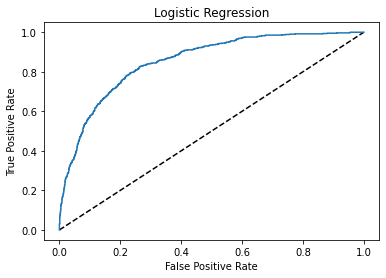

In [151]:
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

# saving the best model

In [152]:
import joblib
joblib.dump(lr, 'lr_file.obj')

['lr_file.obj']

# -------------------------------------------------END-------------------------------------------------------